# Trabajo Práctico 6 - Grupo 2
## Matías Bergerman, Pablo González Leiro, Tobias Demeco, Matías Tripoli

In [2]:
# Import libraries
from PIL import Image
import cv2
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

# Display function
def display_np(x, scale = 1.0, resampling = Image.Resampling.BICUBIC):
    im = Image.fromarray(x.clip(0, 255).astype(np.uint8))
    display(im.resize((np.array(im.size)*scale).astype(int), resampling))

## Ejercicio 1
### Segmentación de imágenes usando espacios de color

In [79]:
# Source: https://realpython.com/python-opencv-color-spaces/

# Colored 3D Scatter Plot

def color_scatter_3d(img, size, mode='rgb'):
    pixel_colors = img.reshape((np.shape(img)[0]*np.shape(img)[1], 3))
    norm = colors.Normalize(vmin=-1.,vmax=1.)
    norm.autoscale(pixel_colors)
    pixel_colors = norm(pixel_colors).tolist()

    if mode=='rgb':
        r, g, b = cv2.split(img)
        fig = plt.figure(figsize=size)
        axis = fig.add_subplot(1, 1, 1, projection="3d")
        
        axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
        axis.set_xlabel("Red")
        axis.set_ylabel("Green")
        axis.set_zlabel("Blue")
    elif mode=='hsv':
        h, s, v = cv2.split(cv2.cvtColor(img, cv2.COLOR_RGB2HSV))
        fig = plt.figure(figsize=size)
        axis = fig.add_subplot(1, 1, 1, projection="3d")

        axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
        axis.set_xlabel("Hue")
        axis.set_ylabel("Saturation")
        axis.set_zlabel("Value")
    elif mode=='hls':
        h, l, s = cv2.split(cv2.cvtColor(img, cv2.COLOR_RGB2HLS))
        fig = plt.figure(figsize=size)
        axis = fig.add_subplot(1, 1, 1, projection="3d")

        axis.scatter(h.flatten(), l.flatten(), s.flatten(), facecolors=pixel_colors, marker=".")
        axis.set_xlabel("Hue")
        axis.set_ylabel("Lightness")
        axis.set_zlabel("Saturation")
    
    plt.show()

#### a) Finding Nemo

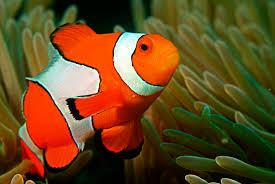

In [37]:
# Color Spaces and Reading Images in OpenCV

nemo = cv2.imread('images/nemo0.jpg')
nemo = cv2.cvtColor(nemo, cv2.COLOR_BGR2RGB)

display_np(nemo)

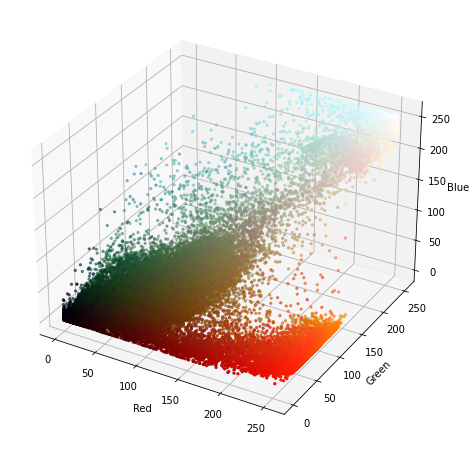

In [45]:
# Visualizing Nemo in RGB Color Space

color_scatter_3d(nemo, (8, 8))

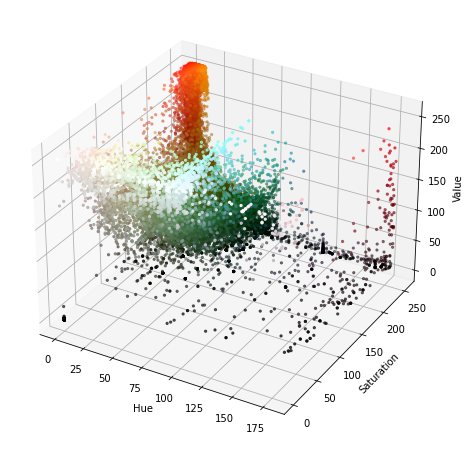

In [46]:
# Visualizing Nemo in HSV Color Space

color_scatter_3d(nemo, (8, 8), 'hsv')

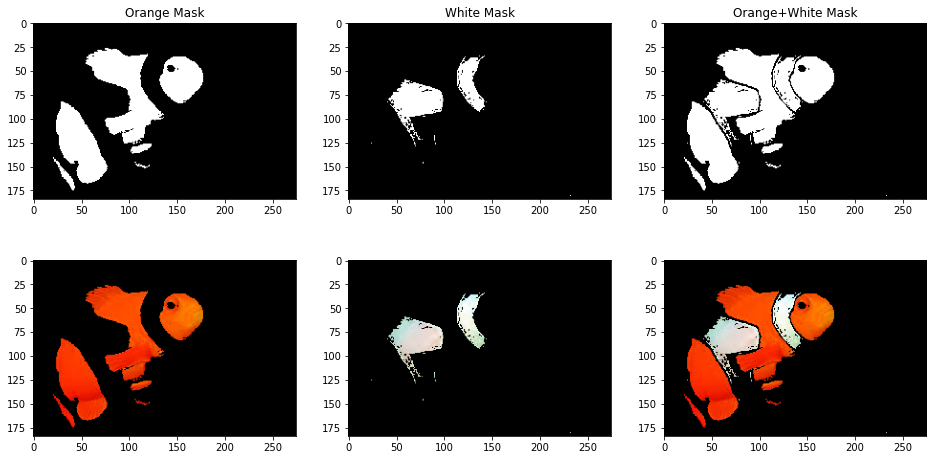

In [59]:
# Picking Out a Range

light_orange = (1, 190, 200)
dark_orange = (18, 255, 255)

hsv_nemo = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)
mask = cv2.inRange(hsv_nemo, light_orange, dark_orange)
result = cv2.bitwise_and(nemo, nemo, mask=mask)

plt.subplots(figsize=(16, 8))
plt.subplot(2, 3, 1)
plt.imshow(mask, cmap="gray")
plt.title('Orange Mask')
plt.subplot(2, 3, 4)
plt.imshow(result)

light_white = (0, 0, 200)
dark_white = (145, 60, 255)

mask_white = cv2.inRange(hsv_nemo, light_white, dark_white)
result_white = cv2.bitwise_and(nemo, nemo, mask=mask_white)

plt.subplot(2, 3, 2)
plt.title('White Mask')
plt.imshow(mask_white, cmap="gray")
plt.subplot(2, 3, 5)
plt.imshow(result_white)


final_mask = mask + mask_white

final_result = cv2.bitwise_and(nemo, nemo, mask=final_mask)
plt.subplot(2, 3, 3)
plt.title('Orange+White Mask')
plt.imshow(final_mask, cmap="gray")
plt.subplot(2, 3, 6)
plt.imshow(final_result)
plt.show()

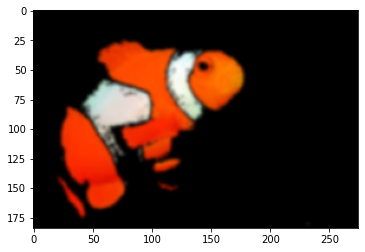

In [60]:
blur = cv2.GaussianBlur(final_result, (7, 7), 0)
plt.imshow(blur)
plt.show()

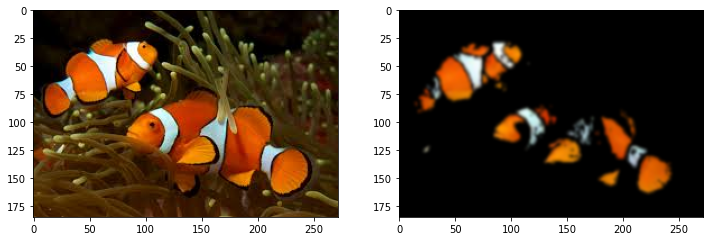

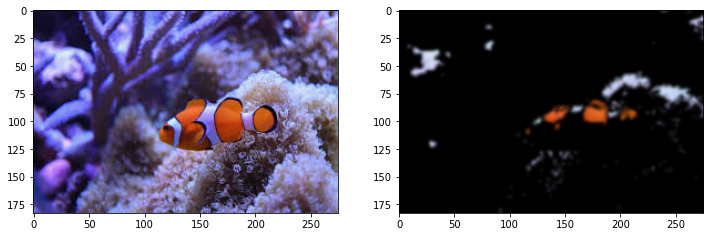

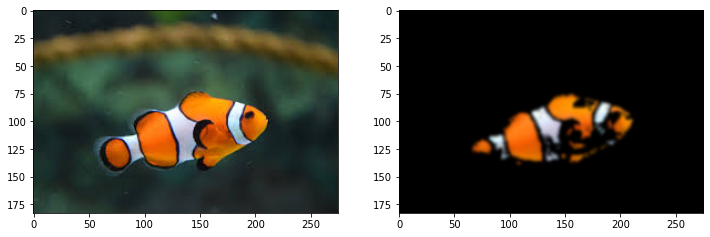

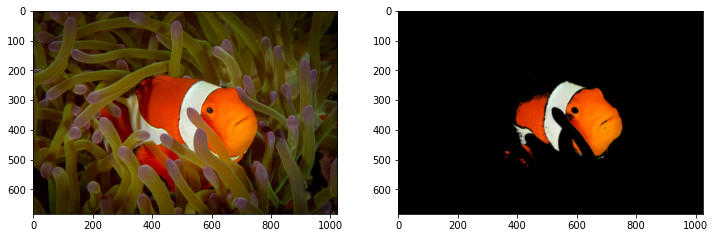

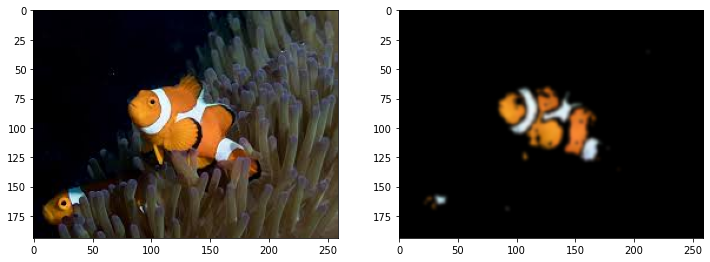

In [65]:
def segment_fish(image):
    ''' Attempts to segment the clownfish out of the provided image '''

    # Convert the image into HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Set the orange range
    light_orange = (1, 190, 200)
    dark_orange = (18, 255, 255)

    # Apply the orange mask 
    mask = cv2.inRange(hsv_image, light_orange, dark_orange)

    # Set a white range
    light_white = (0, 0, 200)
    dark_white = (145, 60, 255)

    # Apply the white mask
    mask_white = cv2.inRange(hsv_image, light_white, dark_white)

    # Combine the two masks
    final_mask = mask + mask_white
    result = cv2.bitwise_and(image, image, mask=final_mask)

    # Clean up the segmentation using a blur
    blur = cv2.GaussianBlur(result, (7, 7), 0)
    return blur

path = "images/nemo"

nemos_friends = []
for i in range(6):
   friend = cv2.cvtColor(cv2.imread(path + str(i) + ".jpg"), cv2.COLOR_BGR2RGB)
   nemos_friends.append(friend)

results = [segment_fish(friend) for friend in nemos_friends]

for i in range(1, 6):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(nemos_friends[i])
    plt.subplot(1, 2, 2)
    plt.imshow(results[i])
    plt.show()

##### Funcionamiento

La forma en la cual este mecanismo de segmentación funciona es aplicando una máscara que elimina todo pixel que no se encuentra dentro de un rango de valores en cada una de las 3 coordenadas del espacio de color elegido. En el caso de HSV, esto significa que todo pixel dentro de un rango de matiz, saturación y brillo es seleccionado mediante una máscara. Así, un pez payaso de color diferente al entorno puede ser detectado.

##### Conclusión

El espacio de color HSV ofrece ciertas ventajas para la segmentación de colores en una imagen, dado que en lugar de basarse en la anatomía de la visión humana, se basan en características más propias del color como el brillo. Aplicando una máscara de cierto rango de valores para la *matiz*, es posible seleccionar un rango de colores con mayor facilidad que en el caso de otros espacios de color.

Sin embargo, se puede notar que en algunas imagenes donde las propiedades de brillo, saturacion o matiz varían con respecto a los rangos elegidos el método deja de funcionar ya que tiene umbrales absolutos.

#### b) Bird

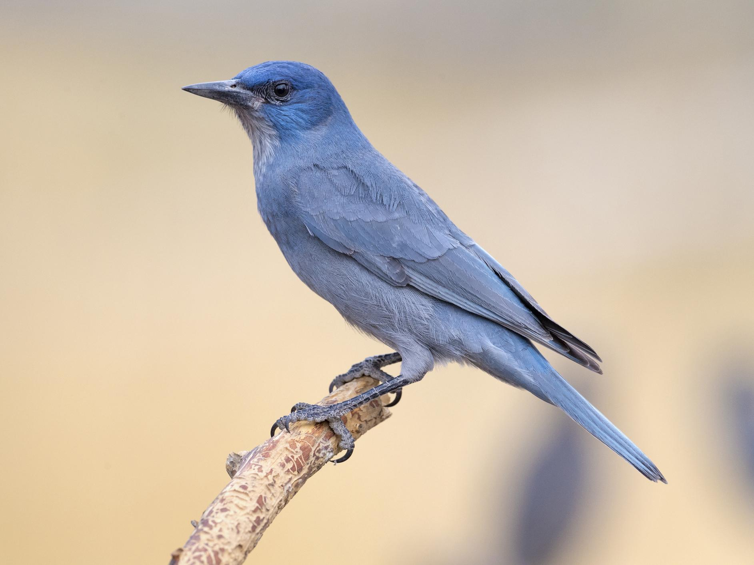

In [72]:
bird = cv2.imread("images/bird.jpg")
bird = cv2.cvtColor(bird, cv2.COLOR_BGR2RGB)

display_np(bird, 0.4)

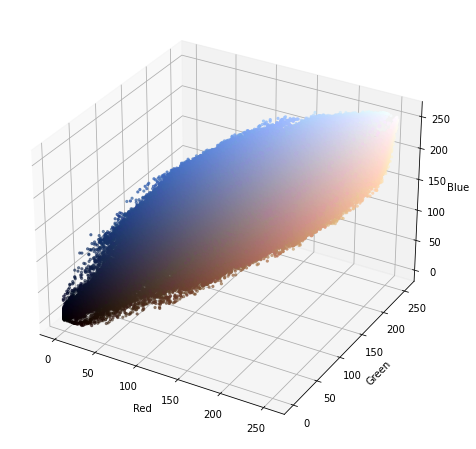

In [73]:
# Visualización en espacio RGB

color_scatter_3d(bird, (8, 8))

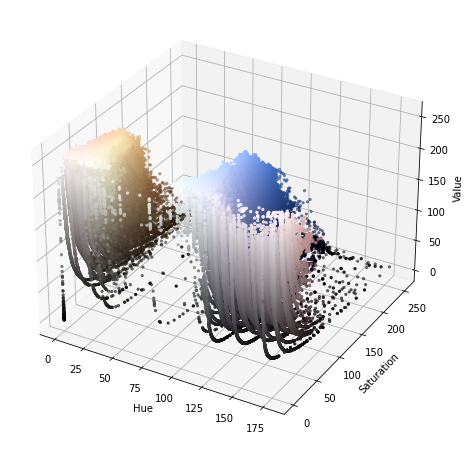

In [74]:
# Visualización en espacio HSV

color_scatter_3d(bird, (8, 8), 'hsv')

Estableciendo dos colores nos quedamos con una "caja" es el espacio HSV, de forma que podemos aislar los tonos azules del pájaro.

In [ ]:
light_blue = (100, 45, 0)
dark_blue = (125, 255, 255)

In [ ]:
from matplotlib.colors import hsv_to_rgb
lo_square = np.full((10, 10, 3), light_blue, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_blue, dtype=np.uint8) / 255.0

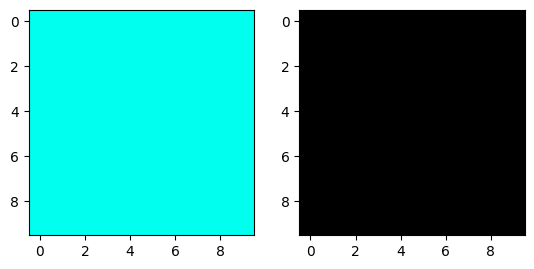

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

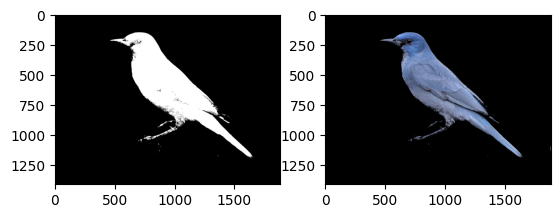

In [ ]:
hsv_bird =  cv2.cvtColor(bird, cv2.COLOR_RGB2HSV)

mask = cv2.inRange(hsv_bird, light_blue, dark_blue)
result = cv2.bitwise_and(bird, bird, mask=mask)

plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

plt.imsave("images/bird_segm.jpg", result)

#### c) Rosa

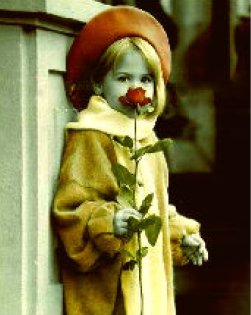

In [75]:
rose = cv2.imread("images/Girl_and_rose.jpg")
rose = cv2.cvtColor(rose, cv2.COLOR_BGR2RGB)

display_np(rose)

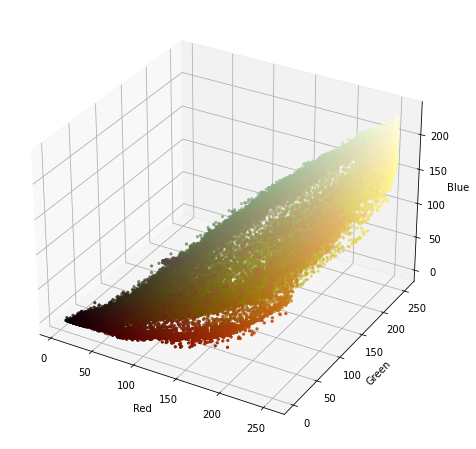

In [76]:
# Visualización en espacio RGB

color_scatter_3d(rose, (8, 8))

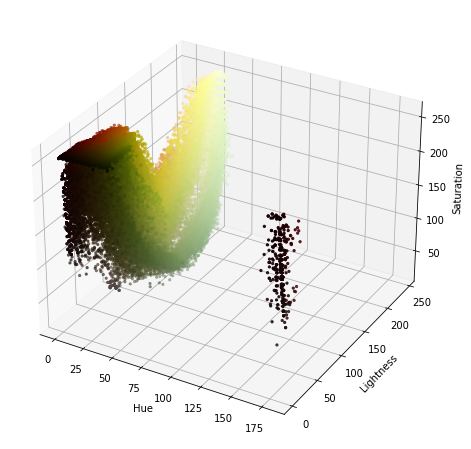

In [80]:
# Visualización en espacio HLS

color_scatter_3d(rose, (8, 8), 'hls')

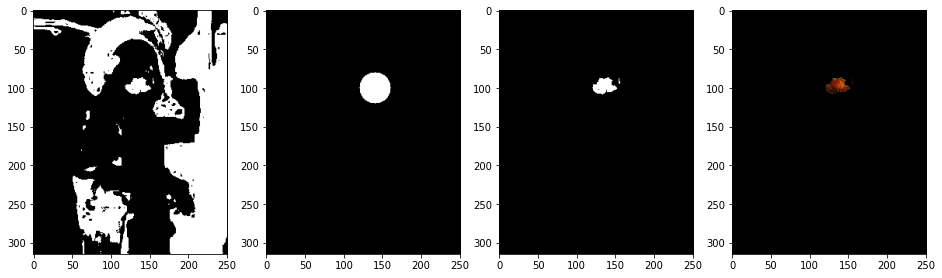

In [81]:
hls_rose =  cv2.cvtColor(rose, cv2.COLOR_RGB2HLS)

light_red = (0, 0, 100)
dark_red = (20, 150, 255)

mask1 = cv2.inRange(hls_rose, light_red, dark_red)

mask2 = np.zeros(rose.shape[:2], dtype="uint8")
cv2.circle(mask2, (140, 100), 20, 255, -1)
cv2.imshow("Rectangular Mask", mask)

mask = mask1 & mask2

rose_only = cv2.bitwise_and(rose, rose, mask=mask)

plt.figure(figsize=(16,5))
plt.subplot(1, 4, 1)
plt.imshow(mask1, cmap="gray")
plt.subplot(1, 4, 2)
plt.imshow(mask2, cmap="gray")
plt.subplot(1, 4, 3)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 4, 4)
plt.imshow(rose_only)
plt.show()

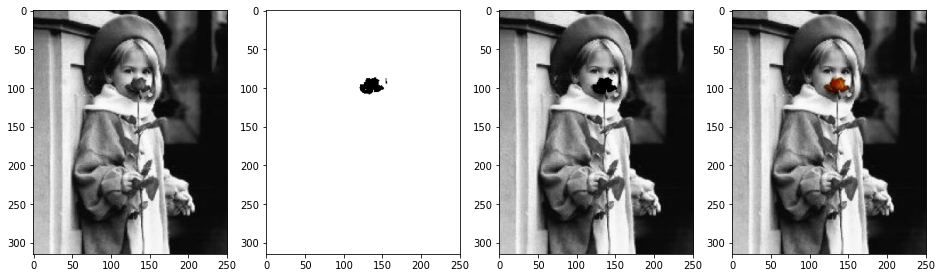

In [82]:
rose_gray = cv2.cvtColor(rose, cv2.COLOR_RGB2GRAY)
rose_gray = np.stack((rose_gray,)*3, axis=-1)

invmask = ~mask

rose_gray_withoutrose = cv2.bitwise_and(rose_gray, rose_gray, mask=invmask) 
result = rose_gray_withoutrose + rose_only

plt.figure(figsize=(16,5))
plt.subplot(1, 4, 1)
plt.imshow(rose_gray, cmap="gray")
plt.subplot(1, 4, 2)
plt.imshow(invmask, cmap="gray")
plt.subplot(1, 4, 3)
plt.imshow(rose_gray_withoutrose, cmap="gray")
plt.subplot(1, 4, 4)
plt.imshow(result)
plt.show()


plt.imsave("images/rose_segm.jpg", result)

#### d) Segmentación de color usando K-Means Clustering

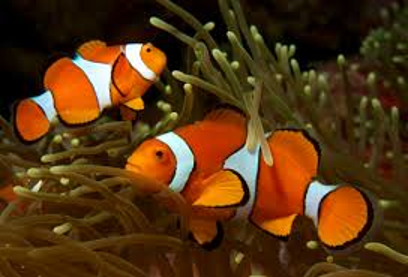

In [3]:
# Source: https://www.thepythoncode.com/article/kmeans-for-image-segmentation-opencv-python

# read the image
image = cv2.imread("images/nemo1.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
display_np(image, 1.5)

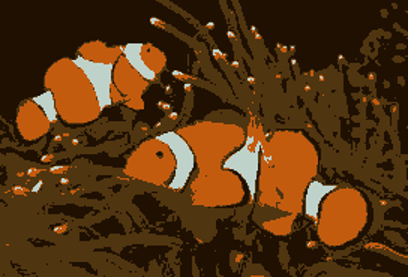

In [4]:
# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# number of clusters (K)
k = 4
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert back to 8 bit values
centers = np.uint8(centers)
# flatten the labels array
labels = labels.flatten()
# convert all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]
# reshape back to the original image dimension
segmented_image = segmented_image.reshape(image.shape)

# show the image
display_np(segmented_image, 1.5)

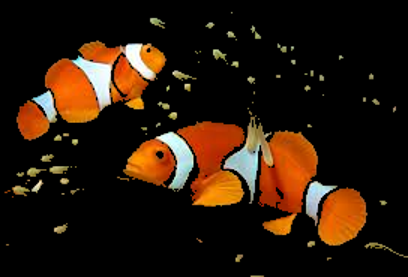

In [6]:
# disable only the cluster number 2 (turn the pixel into black)
masked_image = np.copy(image)
# convert to the shape of a vector of pixel values
masked_image = masked_image.reshape((-1, 3))
# color (i.e cluster) to disable
cluster = 0
masked_image[labels == cluster] = [0, 0, 0]
cluster = 1
masked_image[labels == cluster] = [0, 0, 0]
# convert back to original shape
masked_image = masked_image.reshape(image.shape)

# show the image
display_np(masked_image, 1.5)